# Notebook 02 — Data Understanding & Patient Landscape

Goal:
- Understand patient population and market distribution
- Validate visit and recommendation data quality
- Identify early signals in adoption and follow-up behavior

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("..").resolve()))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (7, 4)

In [2]:
DATA_DIR = Path("../data/raw")

patients = pd.read_csv(DATA_DIR / "patients.csv")
visits = pd.read_csv(DATA_DIR / "visits.csv", parse_dates=["visit_date"])
recs = pd.read_csv(DATA_DIR / "recommendations.csv", parse_dates=["rec_date"])
tx = pd.read_csv(DATA_DIR / "transactions.csv", parse_dates=["tx_date"])
outcomes = pd.read_csv(DATA_DIR / "outcomes.csv", parse_dates=["date"])

patients.shape, visits.shape, recs.shape, tx.shape, outcomes.shape

((50000, 6), (128499, 6), (37358, 7), (70024, 8), (24080, 5))

In [3]:
patients["patient_id"].is_unique, visits["patient_id"].nunique()

patients.isna().sum()

visits.isna().sum()

visit_id      0
patient_id    0
visit_date    0
visit_type    0
clinic_id     0
channel       0
dtype: int64

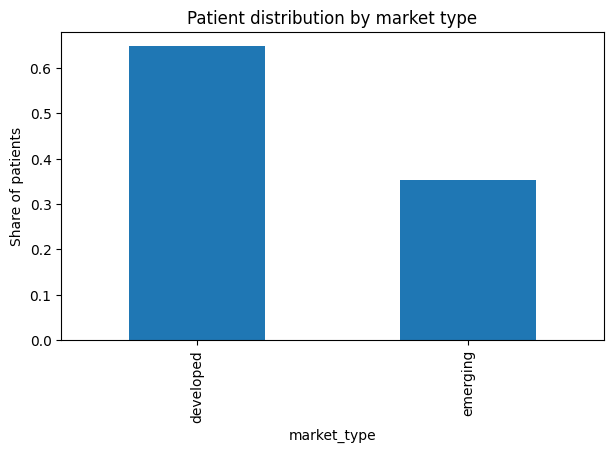

In [4]:
patients["market_type"].value_counts(normalize=True).plot(kind="bar")
plt.title("Patient distribution by market type")
plt.ylabel("Share of patients")
plt.show()

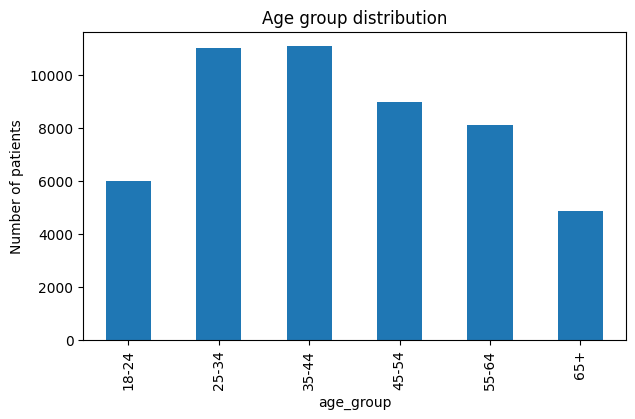

In [5]:
patients["age_group"].value_counts().sort_index().plot(kind="bar")
plt.title("Age group distribution")
plt.ylabel("Number of patients")
plt.show()

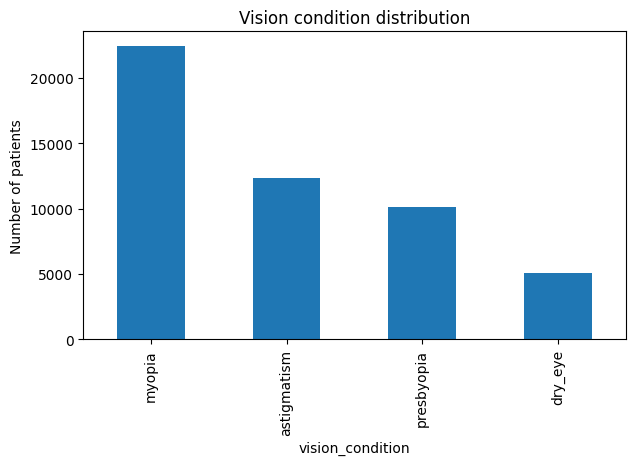

In [6]:
patients["vision_condition"].value_counts().plot(kind="bar")
plt.title("Vision condition distribution")
plt.ylabel("Number of patients")
plt.show()

In [7]:
visits_per_patient = visits.groupby("patient_id").size()

visits_per_patient.describe()

visits_per_patient.value_counts().sort_index().head(10)

1    11034
2    17518
3     8316
4     8179
5     4953
Name: count, dtype: int64

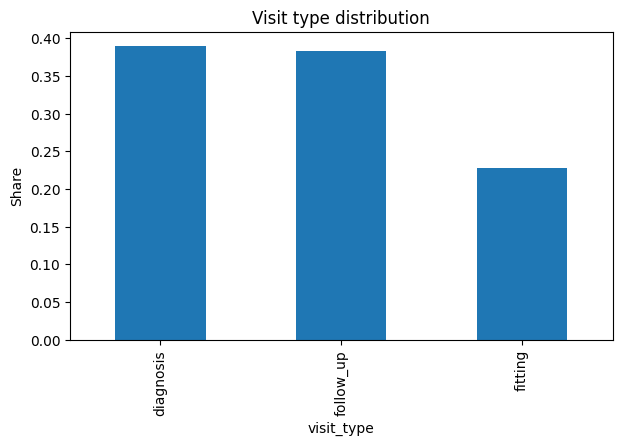

In [8]:
visits["visit_type"].value_counts(normalize=True).plot(kind="bar")
plt.title("Visit type distribution")
plt.ylabel("Share")
plt.show()

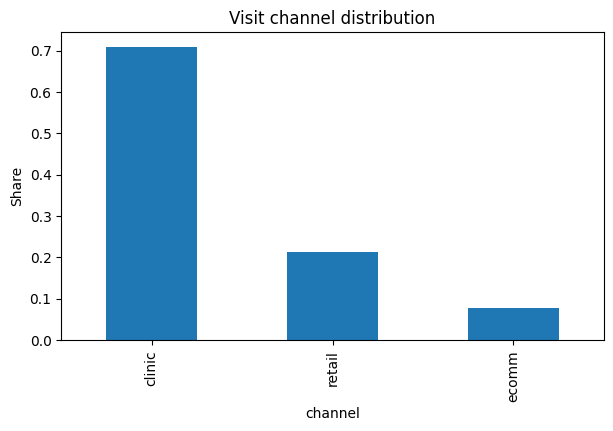

In [9]:
visits["channel"].value_counts(normalize=True).plot(kind="bar")
plt.title("Visit channel distribution")
plt.ylabel("Share")
plt.show()

In [10]:
rec_coverage = recs["patient_id"].nunique() / patients["patient_id"].nunique()
rec_coverage

0.74716

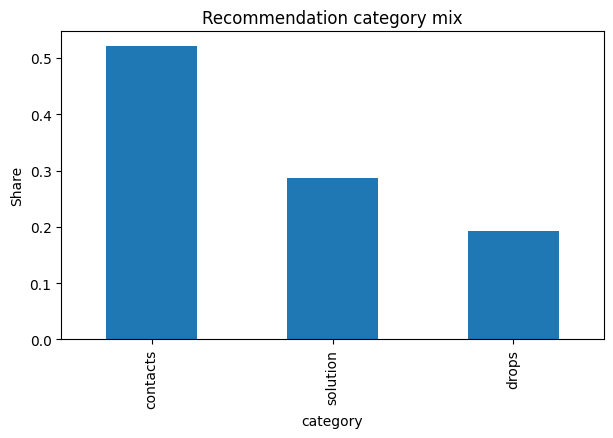

In [11]:
recs["category"].value_counts(normalize=True).plot(kind="bar")
plt.title("Recommendation category mix")
plt.ylabel("Share")
plt.show()

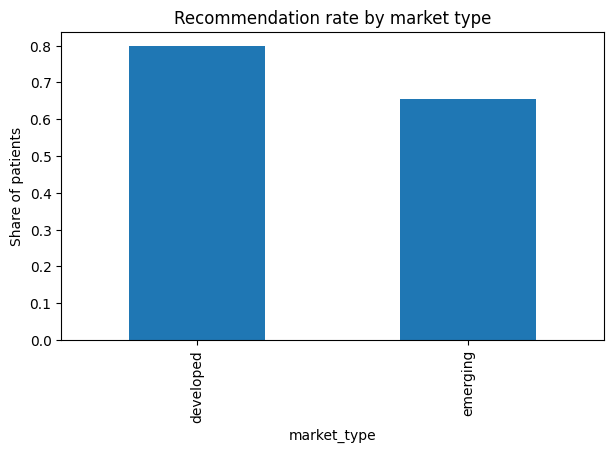

In [13]:
rec_by_market = (
    patients.merge(recs[["patient_id"]].drop_duplicates(), on="patient_id", how="left", indicator=True)
    .assign(has_recommendation=lambda d: d["_merge"] == "both")
    .groupby("market_type")["has_recommendation"]
    .mean()
)

rec_by_market.plot(kind="bar")
plt.title("Recommendation rate by market type")
plt.ylabel("Share of patients")
plt.show()

## Early Insights

- The patient base is skewed toward developed markets, but emerging markets represent a substantial share.
- Most patients have 1–3 visits, indicating limited follow-up depth.
- Recommendations are not universal, suggesting a natural funnel drop after diagnosis.
- Contact lenses dominate recommendations, while drops are more common among dry eye patients.
- These patterns motivate a deeper analysis of adoption funnels and retention cohorts.